# Predictions based on second vector - v2

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth

In [2]:
model_data = pd.read_csv('learning_vectors/v02/version02-FIFAtransfermarkt.csv', sep=',')
model_data = model_data.set_index(['Match_id'])

model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                      'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                      'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
                      'H_age', 'A_age',
                      'H_TMV', 'A_TMV']

print(model_data.shape)
# model_data.head()


(6080, 27)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison:

In [4]:
features = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
            'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
            'H_age', 'A_age',
            'H_TMV', 'A_TMV']

ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

print(model_data[features].shape)
model_data[features].head()


(6080, 20)


,H_Speed,H_Pass,H_Shoot,H_Pressure,H_chPass,H_chCross,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth,H_age,A_age,H_TMV,A_TMV
Match_id,,,,,,,,,,,,,,,,,,,,
1730,66,30,35,30,30,45,40,50,65,40,55,70,70,70,70,70,21.3,24.6,250.0,64.0
1731,60,70,55,35,70,70,70,35,50,35,70,40,50,60,60,40,24.9,23.9,91.0,257.0
1732,58,30,50,30,31,70,70,30,70,70,50,35,70,70,70,35,24.3,25.7,80.0,61.0
1734,60,65,45,40,60,70,70,40,55,70,55,45,60,70,70,45,24.4,26.4,162.0,86.0
1735,70,70,50,30,70,70,70,30,70,50,50,50,50,65,50,50,22.3,22.5,73.0,212.0


### Basic comparison:

Alg/res.mean/res.std
LR: 0.534046 (0.013292)
LDA: 0.534375 (0.010943)
KNN: 0.485526 (0.009835)
CART: 0.430921 (0.007131)
NB: 0.505428 (0.016814)
SVM: 0.472697 (0.010324)


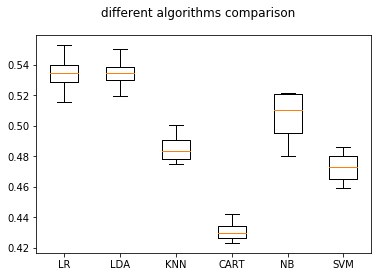

In [5]:
X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Basic comparison with preprocessing:

Alg/res.mean/res.std
LR: 0.531086 (0.015206)
LDA: 0.533388 (0.013235)
KNN: 0.479934 (0.008709)
CART: 0.422368 (0.007990)
NB: 0.500493 (0.015962)
SVM: 0.530921 (0.002979)


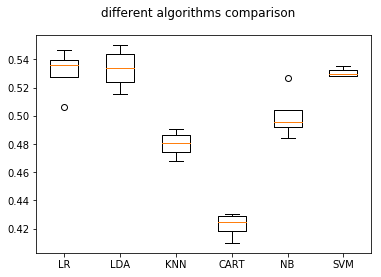

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## Other models comparison:

Alg/res.mean/res.std
LR: 0.534868 (0.005180)
LDA: 0.535362 (0.009515)
KNN: 0.477961 (0.010197)
CART: 0.428947 (0.001918)
NB: 0.522368 (0.010160)
SVM: 0.462500 (0.017350)


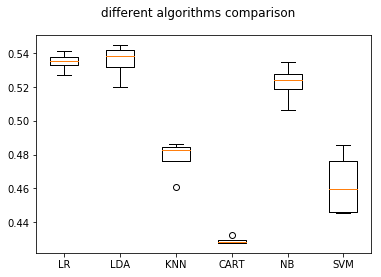

In [7]:
features = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
